In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
print(train_data.shape)
train_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bing, Mr. Lee",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [6]:
train_data= train_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 

In [7]:
print(train_data.shape)
train_data

(891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
print(test_data.shape)
test_data

(418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

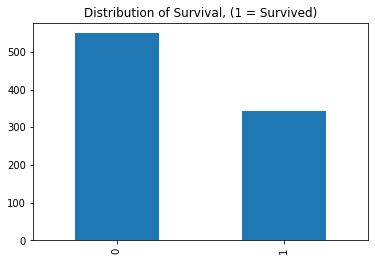

In [9]:
import matplotlib.pyplot as plt
train_data.Survived.value_counts().plot(kind='bar')
plt.title('Distribution of Survival, (1 = Survived)')

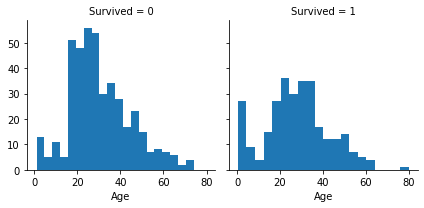

In [11]:
## Next, let's see how age and sex affected survival.
import seaborn as sns
g= sns.FacetGrid(train_data,col='Survived')
g.map(plt.hist, 'Age',bins= 20)

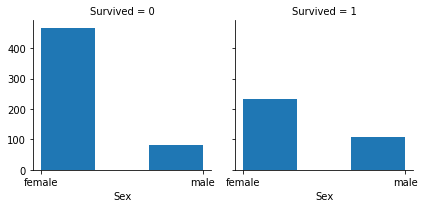

In [12]:
g= sns.FacetGrid(train_data, col= 'Survived')
g.map(plt.hist, 'Sex', bins= 3)

Text(0.5, 1.0, 'Class Distribution')

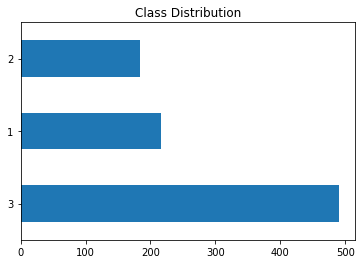

In [13]:
train_data.Pclass.value_counts().plot(kind= 'barh')
plt.title("Class Distribution")

In [14]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


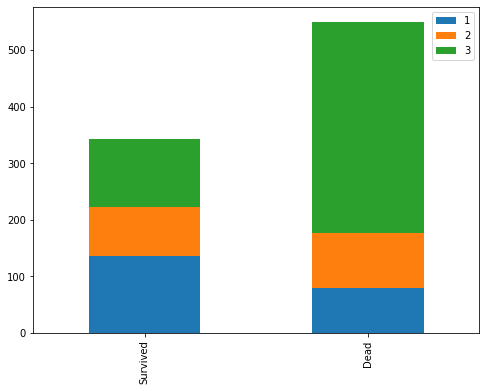

In [39]:
pclass_survived= train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead= train_data[train_data['Survived']==0]['Pclass'].value_counts()
df=pd.DataFrame([pclass_survived, pclass_dead], index=['Survived','Dead'])
df.head()

df.plot(kind='bar', stacked= True, figsize=(8,6))

Text(0.5, 1.0, 'Passengers per boarding location')

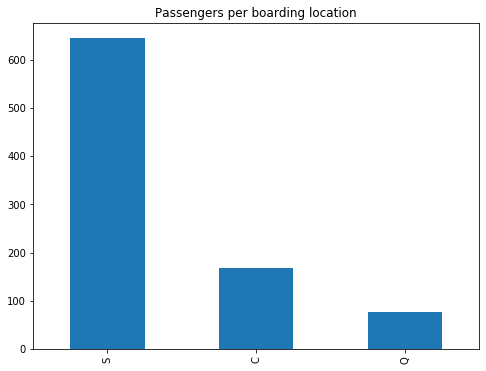

In [42]:
train_data.Embarked.value_counts().plot(kind='bar', figsize=(8,6))
plt.title("Passengers per boarding location")

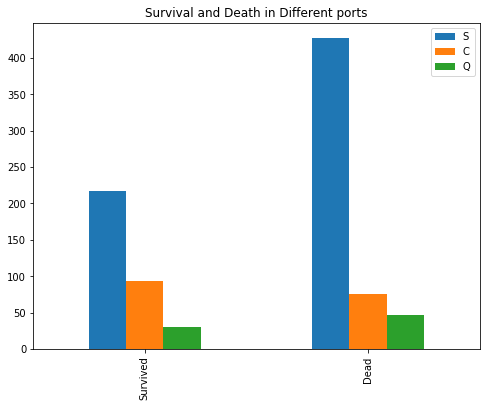

In [15]:
survived= train_data[train_data['Survived']==1]['Embarked'].value_counts()
Dead= train_data[train_data['Survived']==0]['Embarked'].value_counts()
df= pd.DataFrame([survived, Dead], index=['Survived', 'Dead'])
df.plot(kind= 'bar', figsize=(8,6))
plt.title("Survival and Death in Different ports")
plt.show()

In [16]:
survived_mean= train_data[train_data['Survived']==1]["Fare"].mean()
Dead_mean= train_data[train_data['Survived']==0]["Fare"].mean()
sx= [survived_mean, Dead_mean]
ys= ['Dead','Survived']
plt.bar(ys, xs, 0.6, align='center',color = 'green')
plt.xlabel('Outcome')
plt.ylabel('Mean Fare')
plt.show()

NameError: name 'xs' is not defined

In [17]:
## Data Wrangling: Convert categorical variables to integers
def wrangle(dataset):
    # sex {male, female} to {0, 1}
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    # embarked {S, C, Q} => 3 binary variables
    embarked_separate_port = pd.get_dummies(dataset['Embarked'], prefix= 'Embarked')
    dataset = pd.concat([dataset, embarked_separate_port], axis=1)
    return(dataset.drop('Embarked', axis=1))
 
train_data = wrangle(train_data)
test_data = wrangle(test_data)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,NaN,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [18]:
corr = train_data.corr()
print(corr)

            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass     -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex         0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age        -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp      -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch       0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare        0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked_C  0.168240 -0.243292  0.082853  0.036261 -0.059528 -0.011069   
Embarked_Q  0.003650  0.221009  0.074115 -0.022405 -0.026354 -0.081228   
Embarked_S -0.155660  0.081720 -0.125722 -0.032523  0.070941  0.063036   

                Fare  Embarked_C  Embarked_Q  Embarked_S  
Survived    0.257307    0.168240    0.003650   -0.155660  
Pclass     -0.549500   -0.243292    0.221009    0.081720  
Sex     

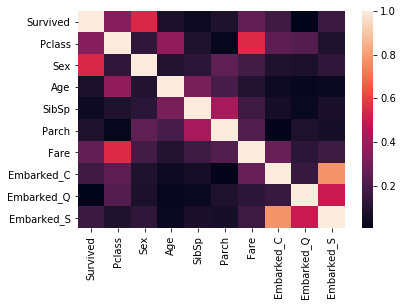

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.heatmap(np.abs(corr),          # use absolute values
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [20]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [21]:
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_data = train_data[(train_data['Sex'] == i) & (train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
 
train_data = wrangle_age(train_data)
test_data = wrangle_age(test_data)

In [22]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [23]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [25]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [27]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

C:\Apps\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ZeroDivisionError: division by zero

C:\Apps\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


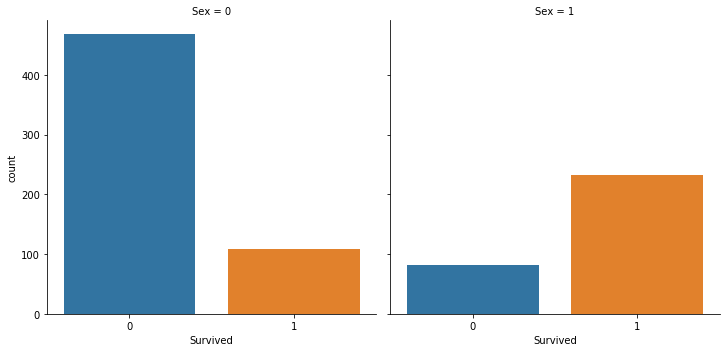

In [28]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=train_data)

In [29]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [30]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    int32  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  FamilySize  891 non-null    int64  
dtypes: float64(1), int32(2), int64(5), uint8(3)
memory usage: 51.5 KB
None


In [31]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-null    int32  
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
 9   FamilySize  418 non-null    int64  
dtypes: float64(1), int32(2), int64(4), uint8(3)
memory usage: 20.9 KB
None


In [32]:
mean_fare = 32
test_data['Fare'] = test_data['Fare'].fillna(32)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X_train = train_data.drop("Survived", axis=1)[:800]
Y_train = train_data["Survived"][:800]
X_crossValidation = train_data.drop("Survived", axis=1)[800:]
Y_crossValidation = train_data["Survived"][800:]
X_test = test_data

In [35]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
train_accuracy = round(model_logistic.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model_logistic.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predL = model_logistic.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

80.25
83.52


C:\Apps\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
svc = SVC()
svc.fit(X_train, Y_train)
train_accuracy = round(svc.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(svc.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predS = svc.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

68.62
68.13


In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
train_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(knn.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predK = knn.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

82.5
75.82


In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(random_forest.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predR = random_forest.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

98.0
87.91


In [40]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_predR
    })
submission.to_csv('submission.csv', index=False)

KeyError: 'PassengerId'

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
 
parameter_grid = {
             'max_depth' : [4, 6, 8],
             'n_estimators': [10, 50,100],
             'max_features': ['sqrt', 'auto', 'log2'],
             'min_samples_split': [0.001,0.003,0.01],
             'min_samples_leaf': [1, 3, 10],
             'bootstrap': [True,False],
             }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(Y_train, n_folds=5)
 
grid_search = GridSearchCV(forest,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cross_validation)
 
grid_search.fit(X_train, Y_train)
model = grid_search
parameters = grid_search.best_params_
 
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [ ]:
Best score: 0.835
Best parameters: {'bootstrap': True, 'min_samples_leaf': 1, 
    'n_estimators': 100, 'min_samples_split': 0.003, 
    'max_features': 'sqrt', 'max_depth': 8}

In [42]:
parameters = {'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 100, 
                  'min_samples_split': 0.01, 'max_features': 'log2', 'max_depth': 8}
model = RandomForestClassifier(**parameters)
    
model.fit(X_train, Y_train)
model.fit(X_train, Y_train)
train_accuracy = round(model.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_pred = model.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

90.75
82.42


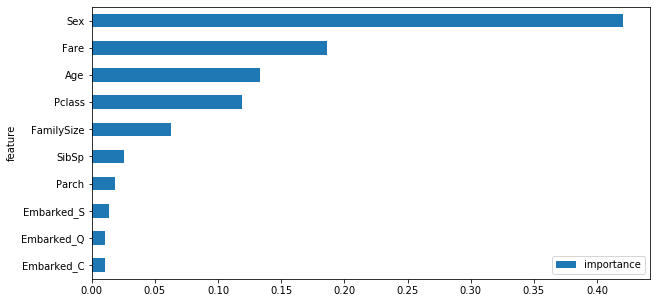

In [43]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(10, 5))